# 🔁 Backpropagation in Neural Networks

## 🧠 What is Backpropagation?

**Backpropagation**, short for **"backward propagation of error"**, is a supervised learning algorithm used for training artificial neural networks using **gradient descent**.

> Given a neural network and a loss function, backpropagation efficiently computes the **gradient of the loss** with respect to the network's weights and biases.

### 🔹 Simple Definition:
> Backpropagation is the **core mechanism** for training a neural network by **adjusting weights and biases** to minimize the error (loss).

---

## 🧩 Steps of Backpropagation:

1. **Initialize weights and biases randomly.**
2. **Pick one training example (a row from dataset).**
3. **Perform forward propagation:**
   - Compute dot product and apply activation functions.
4. **Calculate loss:**
   - Choose a loss function (e.g., MSE).
5. **Backpropagate the error:**
   - Use gradients to calculate how weights and biases contributed to the error.
6. **Update weights and biases using gradients and learning rate.**

### ✏️ Weight & Bias Update Rules:

- **Weight update:**
  $$
  W_{\text{new}} = W_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial W}
  $$

- **Bias update:**
  $$
  b_{\text{new}} = b_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial b}
  $$

---

## 🧮 Concept of Gradient

> A **gradient** is just the **derivative** of the loss with respect to model parameters. It tells us the **direction** and **rate** of change.

- For a simple function:
  $$
  y = f(x) = x^2 + x
  $$
  $$
  \frac{dy}{dx} = 2x + 1
  $$

- For multivariable functions:
  $$
  z = f(x, y) = x^2 + y^2
  $$
  $$
  \frac{\partial z}{\partial x} = 2x, \quad \frac{\partial z}{\partial y} = 2y
  $$
  These are called **partial derivatives** and together they form the **gradient vector**.

---

## 🔗 Chain Rule & Memoization

Backpropagation relies on:
1. **Chain Rule (Calculus)** – to propagate errors backward layer-by-layer.
2. **Memoization (Computer Science)** – to **store intermediate values** (activations, gradients) and reuse them efficiently.

---

## 🎯 What is Convergence?

> A model is said to **converge** when the weight updates become **very small** and the loss stops decreasing significantly.

Mathematically:
$$
w_{n} = w_0 - \eta \cdot \frac{\partial \mathcal{L}}{\partial w} \approx 0
$$

---

## ⚠️ Vanishing Gradient Problem

In deep networks, gradients can become **very small** (close to zero) during backpropagation, especially when using **sigmoid/tanh** activations.

### Example:
$$
0.1 \times 0.1 \times 0.1 \times 0.1 \times 0.1 = 0.00001
$$

If weights stop changing due to very small gradients, the model **fails to learn** further.

### 📉 How to detect it?
- Loss plateaus (doesn't decrease over epochs).
- Plotting weight values shows no significant updates over time.

---

## ✅ How to Handle Vanishing Gradients?

1. **Use ReLU Activation Function:**
   - Unlike sigmoid, ReLU does **not squeeze values** and has gradients of **0 or 1**.
   - ReLU helps preserve the gradient scale during backpropagation.

2. **Proper Weight Initialization:**
   - Use methods like Xavier or He initialization.

3. **Batch Normalization:**
   - Normalizes the inputs of each layer, stabilizing training.

4. **Residual Networks (ResNets):**
   - Add skip connections that bypass layers, preserving gradients.

---

## 🛠️ Improving Neural Network Performance

### 🔧 Tuning Hyperparameters:

| Hyperparameter        | Description                                             |
|------------------------|---------------------------------------------------------|
| Hidden Layers          | More layers = deeper feature extraction                 |
| Neurons per Layer      | More neurons = more capacity to learn                   |
| Learning Rate          | Controls step size during gradient descent              |
| Optimizer              | E.g., SGD, Adam, RMSProp                                |
| Batch Size             | Small = slow but generalizes well; Large = faster       |
| Epochs                 | Use **Early Stopping** to avoid overfitting             |
| Activation Function    | ReLU, Sigmoid, Tanh, etc.                               |

---

## 🔁 Batch Size Types:

| Type                      | Description                                             |
|---------------------------|---------------------------------------------------------|
| Batch Gradient Descent    | Uses the entire dataset per update (slow but stable).   |
| Stochastic Gradient Descent (SGD) | Uses one sample per update (fast but noisy).  |
| Mini-Batch Gradient Descent | Uses small batches (combines stability and speed).    |

> ⚠️ For large batch sizes, use a **learning rate scheduler** to slowly increase the rate at the start (warming-up the learning rate).

---

## 🧠 How to Choose Neurons & Layers?

- **Input Layer**: Depends on number of features (columns in data).
- **Output Layer**:
  - Regression → 1 neuron
  - Binary Classification → 1 neuron
  - Multi-class Classification → No. of classes
- **Hidden Layers**:
  - Use multiple hidden layers with fewer neurons rather than one massive hidden layer.
  - Helps build hierarchical feature representation.

Example:
```text
Input → 16 → 32 → 64 → Output


# 🧠 Improving Neural Networks - Hyperparameters, Architectures, and Best Practices

Neural networks can be fine-tuned and improved using several strategies involving hyperparameters, architectures, data, and optimization techniques. Below are key considerations, explanations, and practices to enhance model performance.

---

## 🔧 1. Fine-Tuning Neural Network Hyperparameters

These are the key hyperparameters that significantly influence the training performance:

- **Number of Hidden Layers**: More layers → higher capacity to learn complex features (deep representation learning).
- **Neurons per Layer**: Affects model complexity. Too few: underfitting. Too many: overfitting.
- **Learning Rate (η)**: Controls the step size in gradient descent.
- **Optimizer**: Algorithms like SGD, Adam, RMSprop.
- **Batch Size**: Impacts training stability and generalization.
- **Activation Functions**: ReLU, Sigmoid, Tanh, Leaky ReLU, etc.
- **Epochs**: Number of passes over the entire dataset.

---

## 🧱 2. Choosing Network Architecture

### 📐 Hidden Layer Design
- Instead of a **single wide hidden layer**, use **multiple layers with fewer neurons**.
- Follows the concept of **deep representation learning**:
  - **Layer 1** learns primitive features
  - **Layer 2** learns feature combinations
  - **Layer 3** learns patterns or objects

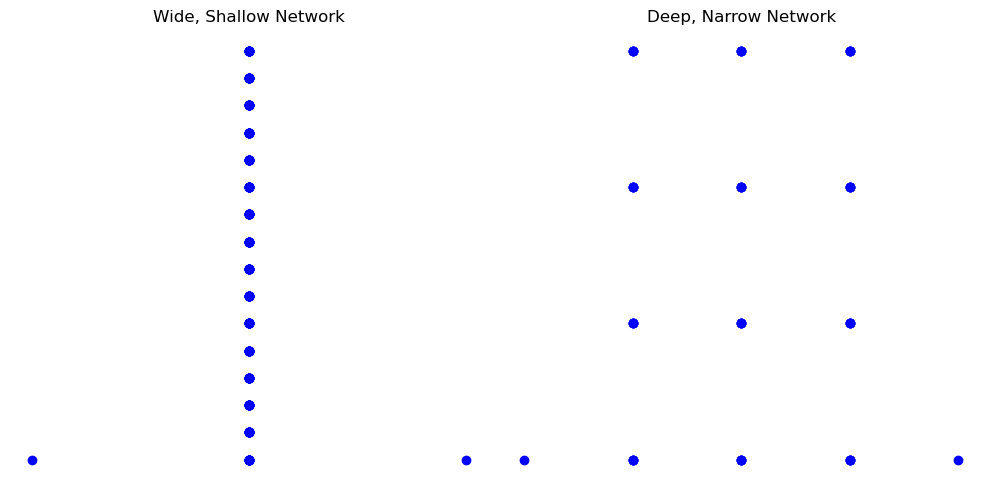

In [1]:
import matplotlib.pyplot as plt

# Visualize two architectures: wide shallow vs deep narrow
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Wide, Shallow Network")
ax[1].set_title("Deep, Narrow Network")

# Simulated structure
for i, (layers, axx) in enumerate(zip([[1, 16, 1], [1, 4, 4, 4, 1]], ax)):
    for l, n in enumerate(layers):
        for j in range(n):
            axx.plot([l]*n, range(n), 'o', color="blue")
    axx.axis('off')

plt.tight_layout()
plt.show()

## ✅ Rule of Thumb

- Add more layers/neurons **until overfitting starts** → stop there.
- Prefer **more layers with fewer neurons** — enables better feature extraction and supports **transfer learning**.

---

## 🔁 3. Batch Size Strategies

| Type                                  | Description     | Pros     | Cons                |
| ------------------------------------- | --------------- | -------- | ------------------- |
| **Batch Gradient Descent**            | Full dataset     | Stable   | Slow                |
| **Stochastic Gradient Descent (SGD)** | 1 sample         | Fast     | Noisy               |
| **Mini-Batch Gradient Descent**       | Small group      | Balanced | Optimal in practice |

> ✅ **Smaller batch size** → Better generalization  
> ⚡ **Larger batch size** → Faster training (requires learning rate warmup)

---

### 🔄 Learning Rate Warmup

> Start with a **low learning rate** and gradually **increase it** during initial epochs.

- Stabilizes training for **large batch sizes**
- Reduces the risk of divergence in early stages

---

## 🔁 4. Epochs & Early Stopping

- **Epoch**: One full pass through the training dataset.
- Train for many epochs, but apply **early stopping** to prevent overfitting.

### ✅ Early Stopping Strategy:

- Monitor **validation loss** after every epoch.
- If **no improvement** after `n` consecutive epochs → **stop training**.

---

## ⚠️ 5. Common Neural Network Problems

### ❗ Vanishing / Exploding Gradients

> Happens due to repeated multiplication of very **small or large derivatives** in deep networks, especially with sigmoid/tanh.

#### 🔧 Fixes:

- ✅ Use **ReLU / Leaky ReLU** instead of sigmoid/tanh
- ✅ Apply **Batch Normalization**
- ✅ Use **Residual Networks (ResNets)** for very deep models
- ✅ Apply **Gradient Clipping**
- ✅ Use proper **Weight Initialization** (He/Xavier Initialization)


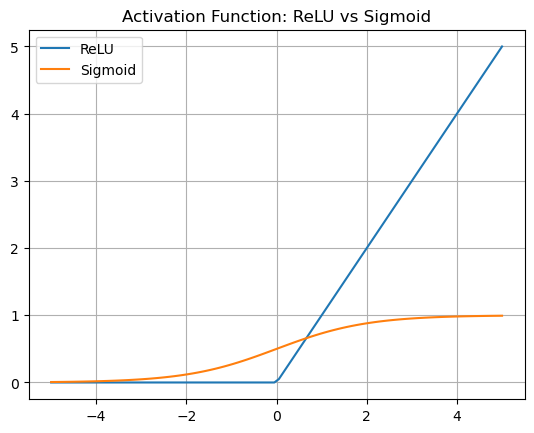

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, relu, label='ReLU')
plt.plot(x, sigmoid, label='Sigmoid')
plt.title("Activation Function: ReLU vs Sigmoid")
plt.legend()
plt.grid(True)
plt.show()


## ❗ Not Enough Data

When data is limited, models tend to overfit and fail to generalize well.

### ✅ Fixes:
- **Data Augmentation**: Create synthetic variations (especially for images).
- **Transfer Learning**: Use pre-trained models on similar tasks.
- **Unsupervised Pretraining**: Use autoencoders or self-supervised learning.

---

## ⏳ 6. Slow Training

### ❌ Causes:
- Large models or huge datasets
- Poor optimizer choice
- Bad learning rate

### ✅ Fixes:
- Use **efficient optimizers** like **Adam**, **RMSprop**
- Apply **Learning Rate Scheduler**
- Reduce model complexity (fewer layers/neurons)

---

## 🎯 7. Overfitting

> Model performs well on training data but poorly on unseen/test data.

### ✅ Solutions:
- **L1 / L2 Regularization**
- **Dropout**
- **Reduce number of neurons/layers**
- **Collect more data**
- **Data Augmentation**
- **Early Stopping**

---

## 💬 Summary Table

| Category       | Issue               | Solution                                |
| -------------- | ------------------- | --------------------------------------- |
| Optimization   | Vanishing Gradients | ReLU, BatchNorm, Gradient Clipping      |
| Data           | Not Enough          | Transfer Learning, Pretraining          |
| Training       | Slow Training       | Adam, LR Scheduler                      |
| Generalization | Overfitting         | Regularization, Dropout, Early Stopping |

---

📌 **Tip**: Always monitor **training** and **validation loss/accuracy curves** to guide tuning decisions.

---

## 📉 Simulating a Typical Overfitting Pattern




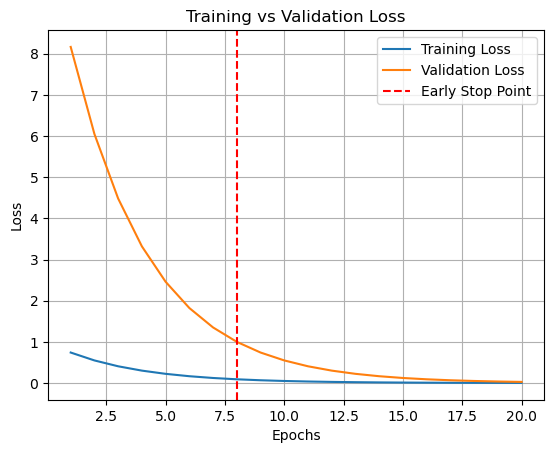

In [3]:

import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)
train_loss = np.exp(-0.3 * epochs)
val_loss = np.exp(-0.3 * (epochs - 8))

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.axvline(8, color='red', linestyle='--', label='Early Stop Point')
plt.legend()
plt.grid(True)
plt.show()